# Linear/ Lasso

This file turns the Linear/Lasso Model into a .pkl file so we can use it in our frontend.

In [3]:
import kagglehub
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import StandardScaler, MinMaxScaler

kagglehub.login()

## Import and Inspect the Data

Import the data set.

# Linear Regression Model

Mean Squared Error (MSE): 369.59
R-squared (R2): 0.255
Mean Absolute Error (MAE): 14.13
Relative Accuracy: 57.16%


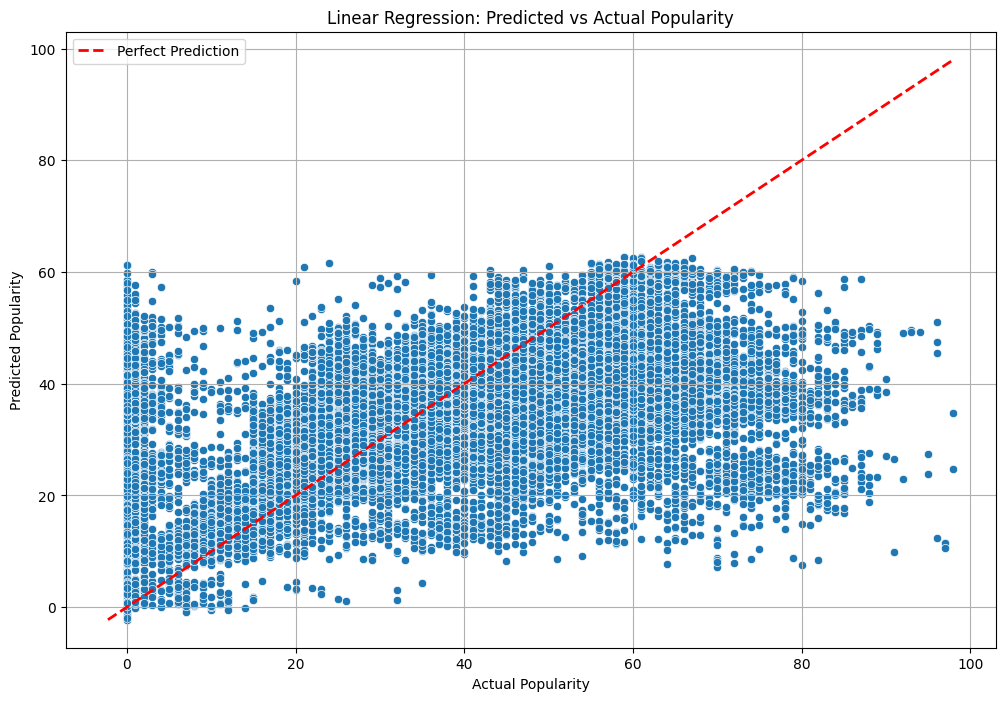

['models/feature_columns_linear.pkl']

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import joblib

dataset_path = kagglehub.dataset_download("maharshipandya/-spotify-tracks-dataset")

df = pd.read_csv(dataset_path + "/dataset.csv")
df = df.dropna()

onehot = OneHotEncoder(sparse_output=False)
genre_encoded = onehot.fit_transform(df[['track_genre']])
genre_names = onehot.categories_[0]
genre_encoded_df = pd.DataFrame(genre_encoded, columns=genre_names)

columns_to_drop = ['track_id', 'artists', 'album_name', 'track_name', 'track_genre']
df_with_encoded_genres = pd.concat([df, genre_encoded_df], axis=1)
df_with_encoded_genres = df_with_encoded_genres.drop(columns=columns_to_drop)

df_with_encoded_genres = df_with_encoded_genres.dropna()

numerical_features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'tempo']
features = numerical_features + list(genre_names)
target = 'popularity'

X = df_with_encoded_genres[features]
y = df_with_encoded_genres[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model=LinearRegression()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mean_actual = np.mean(y_test)
relative_accuracy = 1 - (mae / mean_actual)

print("Mean Squared Error (MSE):", round(mse, 2))
print("R-squared (R2):", round(r2, 3))
print("Mean Absolute Error (MAE):", round(mae, 2))
print(f"Relative Accuracy: {relative_accuracy * 100:.2f}%")

plt.figure(figsize=(12, 8))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Popularity")
plt.ylabel("Predicted Popularity")
plt.title("Linear Regression: Predicted vs Actual Popularity")

min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')
plt.grid(True)
plt.legend()
plt.show()

joblib.dump(model, 'models/linear_model.pkl')
joblib.dump(scaler, 'models/scaler_linear.pkl')
joblib.dump(features, 'models/feature_columns_linear.pkl')


# Lasso Regression Model

Mean Squared Error (MSE): 369.59
R-squared (R2): 0.255
Mean Absolute Error (MAE): 14.15
Relative Accuracy: 57.10%


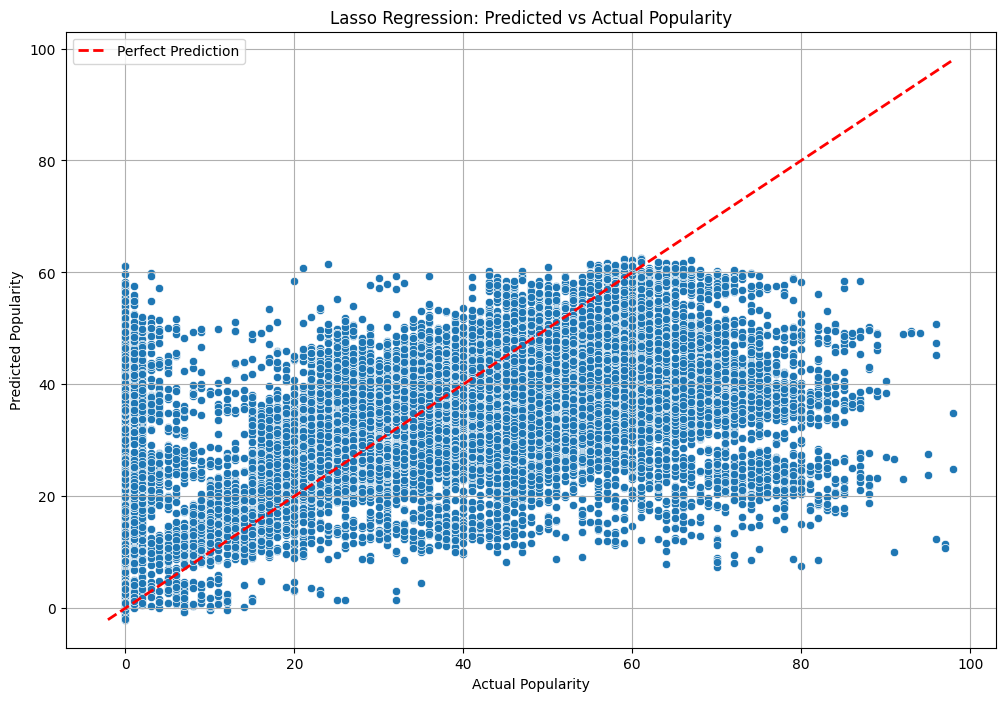

['models/feature_columns_lasso.pkl']

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

dataset_path = kagglehub.dataset_download("maharshipandya/-spotify-tracks-dataset")

df = pd.read_csv(dataset_path + "/dataset.csv")
df = df.dropna()

onehot = OneHotEncoder(sparse_output=False)
genre_encoded = onehot.fit_transform(df[['track_genre']])
genre_names = onehot.categories_[0]
genre_encoded_df = pd.DataFrame(genre_encoded, columns=genre_names)

columns_to_drop = ['track_id', 'artists', 'album_name', 'track_name', 'track_genre']
df_with_encoded_genres = pd.concat([df, genre_encoded_df], axis=1)
df_with_encoded_genres = df_with_encoded_genres.drop(columns=columns_to_drop)

df_with_encoded_genres = df_with_encoded_genres.dropna()

numerical_features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'tempo']
features = numerical_features + list(genre_names)
target = 'popularity'

X = df_with_encoded_genres[features]
y = df_with_encoded_genres[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Lasso(alpha=0.01)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mean_actual = np.mean(y_test)
relative_accuracy = 1 - (mae / mean_actual)

print("Mean Squared Error (MSE):", round(mse, 2))
print("R-squared (R2):", round(r2, 3))
print("Mean Absolute Error (MAE):", round(mae, 2))
print(f"Relative Accuracy: {relative_accuracy * 100:.2f}%")

plt.figure(figsize=(12, 8))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title("Lasso Regression: Predicted vs Actual Popularity")

min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')
plt.grid(True)
plt.legend()
plt.show()

joblib.dump(model, 'models/lasso_model.pkl')
joblib.dump(scaler, 'models/scaler_lasso.pkl')
joblib.dump(features, 'models/feature_columns_lasso.pkl')


# Random Forest Regressor

Random Forest Regressor
Mean Squared Error (MSE): 357.69
R² Score: 0.284
Mean Absolute Error (MAE): 14.72
Relative Accuracy: 22.21%


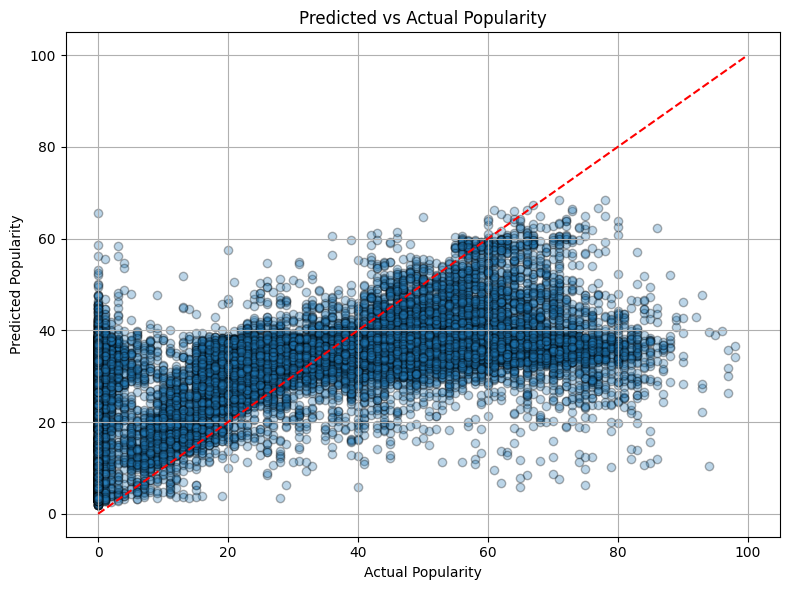

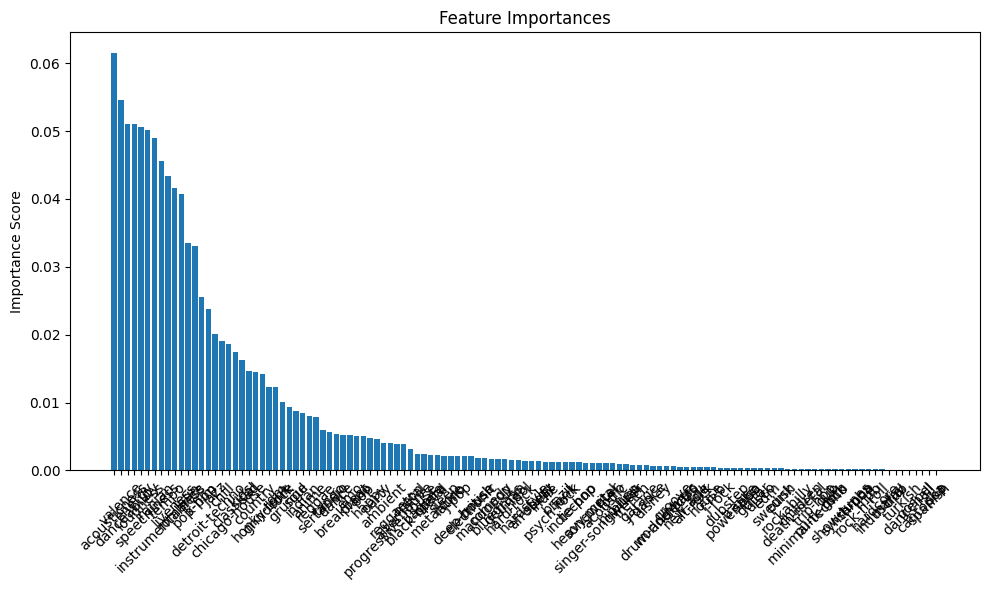

['models/feature_columns_rf.pkl']

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import kagglehub
import joblib

dataset_path = kagglehub.dataset_download("maharshipandya/-spotify-tracks-dataset")
df = pd.read_csv(dataset_path + "/dataset.csv")

df = df.dropna()

onehot = OneHotEncoder(sparse_output=False)
genre_encoded = onehot.fit_transform(df[['track_genre']])
genre_names = onehot.categories_[0]
genre_encoded_df = pd.DataFrame(genre_encoded, columns=genre_names)

columns_to_drop = ['track_id', 'artists', 'album_name', 'track_name', 'track_genre']
df_with_encoded_genres = pd.concat([df, genre_encoded_df], axis=1)
df_with_encoded_genres = df_with_encoded_genres.drop(columns=columns_to_drop)

numerical_features = [
    'danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
    'instrumentalness', 'liveness', 'valence', 'tempo'
]
features = numerical_features + list(genre_names)
target = 'popularity'

df_clean = df_with_encoded_genres.dropna(subset=features + [target])
df_sample = df_clean.sample(n=100000, random_state=42)

X = df_sample[features]
y = df_sample[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

forest = RandomForestRegressor(n_estimators=500, max_depth=30, min_samples_split=5, min_samples_leaf=2, max_features='sqrt', bootstrap=True, random_state=42, n_jobs=-1)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
accuracy = 100 * (1 - (np.sum(np.abs(y_test - y_pred)) / np.sum(np.abs(y_test - np.mean(y_test)))))

print("Random Forest Regressor")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Relative Accuracy: {accuracy:.2f}%")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.3, edgecolors='k')
plt.xlabel("Actual Popularity")
plt.ylabel("Predicted Popularity")
plt.title("Predicted vs Actual Popularity")
plt.grid(True)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.tight_layout()
plt.show()

importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
sorted_features = [features[i] for i in indices]

plt.figure(figsize=(10, 6))
plt.bar(range(len(features)), importances[indices], align='center')
plt.xticks(range(len(features)), sorted_features, rotation=45)
plt.title("Feature Importances")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

joblib.dump(forest, 'models/random_forest.pkl')
joblib.dump(features, 'models/feature_columns_rf.pkl')

